In [1]:
import requests
import pandas as pd

file_url = 'https://raw.githubusercontent.com/ani-exe/simple_ao3_scraper/main/outfile.json'
data = requests.get(file_url).json()
data = data['data']
df = pd.DataFrame(data)
df.dtypes

title               object
author              object
isAnon                bool
isOrphan              bool
id                  object
rating              object
warnings            object
category            object
isWip                 bool
lastUpdated         object
relationships       object
isSlash               bool
freeforms           object
summary             object
isSeries              bool
seriesMeta          object
language            object
words                int64
currentChapters      int64
intendedChapters    object
kudos                int64
hits                 int64
comments             int64
bookmarks            int64
collections          int64
dtype: object

In [2]:
# kudos / hits can be useful for another view (altho favors newer works & oneshots)
# versus overall stats which favors multichap & older
# wonder what the balance would be here.

df = df.assign(kudos_per_hits = df.kudos / df.hits)
df['lastUpdated'] = pd.to_datetime(pd.to_datetime(df['lastUpdated'],format='%Y-%m-%d', errors='coerce'))
df['rating'] = df['rating'].str[:1]

df = df.assign(numSeries = df['seriesMeta'].str.len())
df

,title,author,isAnon,isOrphan,id,rating,warnings,category,isWip,lastUpdated,...,words,currentChapters,intendedChapters,kudos,hits,comments,bookmarks,collections,kudos_per_hits,numSeries
0,Late night texting,cpn86457,False,False,/works/47353927,E,[Choose Not To Use Archive Warnings],[M/M],False,NaT,...,1005,1,1,26,147,4,2,0,0.176871,0
1,Hollow: A Demon!Serizawa Story,Ace_in_the_Hole,False,False,/works/46349863,M,[No Archive Warnings Apply],[M/M],True,NaT,...,46761,19,?,168,3062,51,22,0,0.054866,0
2,Show them who's boss,fallenangel0666,False,False,/works/47351500,G,[Choose Not To Use Archive Warnings],[F/M],False,NaT,...,2361,1,1,2,22,0,0,0,0.090909,0
3,"The Ghost, the Girl, and the Little Death",La_Marionnette_Grotesque,False,False,/works/47303989,E,[Underage],[F/M],False,NaT,...,6337,1,1,7,61,2,2,0,0.114754,0
4,Our Dirty Fingers,madburnishing,False,False,/works/37914952,E,"[Choose Not To Use Archive Warnings, Graphic D...",[M/M],True,NaT,...,12147,22,?,60,1111,6,6,0,0.054005,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7076,Double Team Tactic,orphan_account,False,True,/works/5782909,M,[Underage],[M/M],False,NaT,...,5281,1,1,792,12713,41,62,0,0.062298,0
7077,1,slutreigen (pleasejustno),False,False,/works/5613691,G,[No Archive Warnings Apply],[No category],False,NaT,...,356,1,1,206,2225,15,5,0,0.092584,1
7078,Brother's Keeper,allthingsunrelated,False,False,/works/5239292,N,[Choose Not To Use Archive Warnings],[Gen],False,NaT,...,1722,1,1,252,1934,7,43,0,0.130300,0
7079,senses,ekubo (apurochi),False,False,/works/2535437,T,[Underage],[M/M],False,NaT,...,266,1,1,172,2788,5,5,1,0.061693,0


In [3]:
df.describe()

,words,currentChapters,kudos,hits,comments,bookmarks,collections,kudos_per_hits,numSeries
count,7.081000e+03,7081.000000,7081.000000,7081.000000,7081.000000,7081.000000,7081.000000,7081.000000,7081.000000
mean,6.596370e+03,2.177376,207.094196,2183.903827,22.996469,23.259992,0.071883,0.110377,0.208304
std,6.793271e+04,13.032083,395.374569,6102.839445,102.274616,70.866579,0.299814,0.050664,0.416087
min,1.000000e+02,1.000000,0.000000,11.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.149000e+03,1.000000,47.000000,486.000000,4.000000,3.000000,0.000000,0.072013,0.000000
50%,2.270000e+03,1.000000,109.000000,1067.000000,8.000000,8.000000,0.000000,0.105263,0.000000
75%,4.947000e+03,1.000000,225.000000,2239.000000,18.000000,21.000000,0.000000,0.142578,0.000000
max,5.450041e+06,1058.000000,12515.000000,387030.000000,5887.000000,2705.000000,8.000000,0.436170,2.000000


In [4]:
numeric_stats = ["words", "kudos", "hits", "comments", "bookmarks", "kudos_per_hits"]
rating_per_avg_stat = df[["rating"] + numeric_stats].groupby("rating").mean()
rating_per_avg_stat

,words,kudos,hits,comments,bookmarks,kudos_per_hits
rating,,,,,,
E,6351.916667,208.468254,3470.637897,17.413690,18.721230,0.061170
G,2842.076756,206.971398,1633.273353,15.129254,22.013758,0.134546
M,21124.549822,181.402135,2329.195730,38.500000,20.448399,0.084678
N,3712.113684,126.458947,1196.126316,10.926316,11.951579,0.107478
T,8276.649077,229.827177,2452.748901,33.716359,29.842568,0.109791


<AxesSubplot:xlabel='rating'>

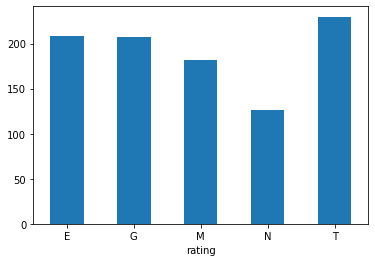

In [5]:
rating_per_avg_stat["kudos"].plot.bar(rot=0)

<AxesSubplot:xlabel='rating'>

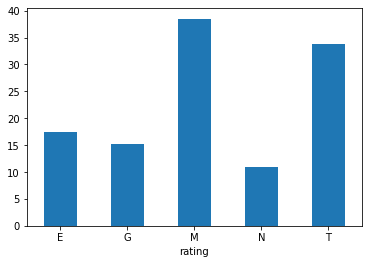

In [6]:
rating_per_avg_stat["comments"].plot.bar(rot=0)


<AxesSubplot:xlabel='rating'>

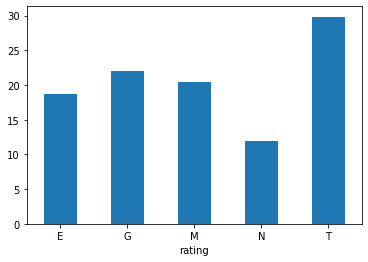

In [7]:
rating_per_avg_stat["bookmarks"].plot.bar(rot=0)


<AxesSubplot:xlabel='rating'>

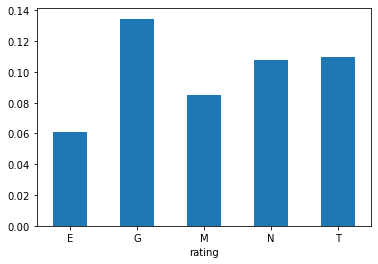

In [8]:
rating_per_avg_stat["kudos_per_hits"].plot.bar(rot=0)

<AxesSubplot:xlabel='rating'>

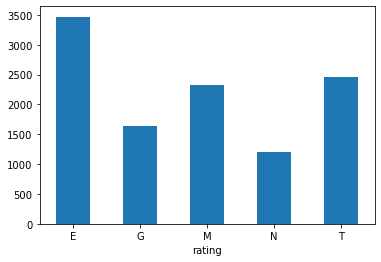

In [9]:
rating_per_avg_stat["hits"].plot.bar(rot=0)


In [10]:
# do wips do worse than completed fics?
iswip_per_avg_stat = df[["isWip"] + numeric_stats].groupby("isWip").mean()
iswip_per_avg_stat

,words,kudos,hits,comments,bookmarks,kudos_per_hits
isWip,,,,,,
False,4286.425932,215.419492,2126.390339,18.778136,23.717797,0.115394
True,18136.313294,165.502964,2471.227773,44.070279,20.972904,0.085316


In [11]:
#oneshots only
oneshot_avg_stats = df[df["intendedChapters"] == "1"]
oneshot_avg_stats.describe()

,words,currentChapters,kudos,hits,comments,bookmarks,collections,kudos_per_hits,numSeries
count,5192.000000,5192.0,5192.000000,5192.000000,5192.000000,5192.000000,5192.000000,5192.000000,5192.000000
mean,2601.641371,1.0,186.095532,1705.005586,11.010401,18.455701,0.075501,0.118919,0.224961
std,2676.284349,0.0,292.072530,2487.647836,15.048905,45.963199,0.277730,0.052376,0.428526
min,100.000000,1.0,0.000000,18.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,988.000000,1.0,48.000000,471.000000,3.000000,3.000000,0.000000,0.080868,0.000000
50%,1731.000000,1.0,108.000000,998.000000,7.000000,7.000000,0.000000,0.117133,0.000000
75%,3230.250000,1.0,215.000000,2006.000000,14.000000,18.000000,0.000000,0.152174,0.000000
max,29089.000000,1.0,6433.000000,55937.000000,365.000000,1610.000000,4.000000,0.436170,2.000000


In [12]:
#multichap fics only
multichap_avg_stats = df[df["intendedChapters"] != "1"] # could be a number or a '?'
multichap_avg_stats.describe()

,words,currentChapters,kudos,hits,comments,bookmarks,collections,kudos_per_hits,numSeries
count,1.889000e+03,1889.000000,1889.000000,1889.000000,1889.000000,1889.000000,1889.000000,1889.000000,1889.000000
mean,1.757606e+04,5.413446,264.809952,3500.176813,55.940709,36.464796,0.061938,0.086899,0.162520
std,1.308492e+05,24.951798,589.161397,10967.609052,192.669960,113.076362,0.353369,0.036486,0.376133
min,1.220000e+02,1.000000,0.000000,11.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2.934000e+03,2.000000,43.000000,565.000000,6.000000,3.000000,0.000000,0.060818,0.000000
50%,6.613000e+03,3.000000,112.000000,1331.000000,17.000000,11.000000,0.000000,0.082792,0.000000
75%,1.579600e+04,6.000000,268.000000,3190.000000,44.000000,29.000000,0.000000,0.109034,0.000000
max,5.450041e+06,1058.000000,12515.000000,387030.000000,5887.000000,2705.000000,8.000000,0.280899,2.000000


In [13]:
#do fics in series have more engagement?
df[df["isSeries"]].describe()

,words,currentChapters,kudos,hits,comments,bookmarks,collections,kudos_per_hits,numSeries
count,1.446000e+03,1446.000000,1446.000000,1446.000000,1446.000000,1446.000000,1446.000000,1446.000000,1446.000000
mean,1.055712e+04,2.739281,221.632780,2465.248271,30.132089,20.952282,0.064315,0.104913,1.020055
std,1.481766e+05,28.056797,343.638071,4509.764832,177.930276,56.274240,0.274673,0.041359,0.140238
min,1.000000e+02,1.000000,2.000000,25.000000,0.000000,0.000000,0.000000,0.005294,1.000000
25%,1.063000e+03,1.000000,66.000000,640.250000,4.000000,3.000000,0.000000,0.077560,1.000000
50%,2.094500e+03,1.000000,127.500000,1339.000000,9.000000,8.000000,0.000000,0.102396,1.000000
75%,4.892000e+03,1.000000,243.000000,2679.000000,19.000000,19.750000,0.000000,0.130216,1.000000
max,5.450041e+06,1058.000000,4834.000000,66105.000000,5887.000000,1206.000000,4.000000,0.301471,2.000000


In [14]:
# let's get the bar graph of all relationships in the tag and see if we need to fix some tags
from itertools import chain
from collections import Counter
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = [20, 5]


rel_only = df[df['relationships'].str.len() > 0]
print(((rel_only['relationships'].size / df.relationships.size) *100),'% of MP100 fics contain relationship tags')

87.37466459539614 % of MP100 fics contain relationship tags


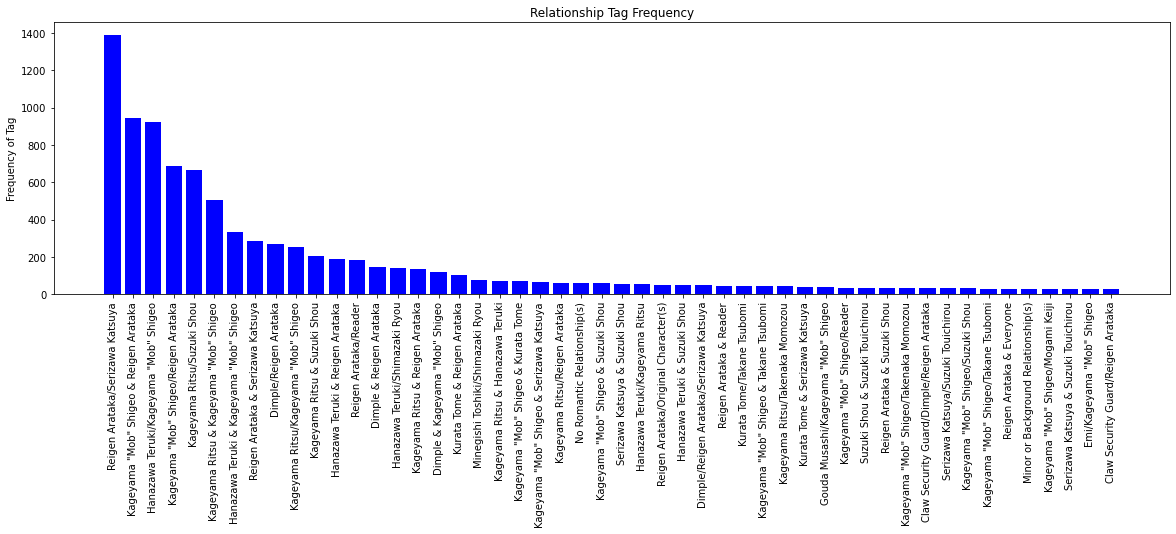

In [15]:
ls_rel = rel_only.relationships.tolist()
ctr = Counter(chain.from_iterable(ls_rel))
ctr.most_common(50)

y = [count for tag, count in ctr.most_common(50)]
x = [tag for tag, count in ctr.most_common(50)]

plt.bar(x, y, color='blue')
plt.title("Relationship Tag Frequency")
plt.ylabel("Frequency of Tag")
plt.xticks(rotation=90)
plt.show()

In [16]:
ctr.most_common(50)

[('Reigen Arataka/Serizawa Katsuya', 1386),
 ('Kageyama "Mob" Shigeo & Reigen Arataka', 944),
 ('Hanazawa Teruki/Kageyama "Mob" Shigeo', 920),
 ('Kageyama "Mob" Shigeo/Reigen Arataka', 687),
 ('Kageyama Ritsu/Suzuki Shou', 666),
 ('Kageyama Ritsu & Kageyama "Mob" Shigeo', 504),
 ('Hanazawa Teruki & Kageyama "Mob" Shigeo', 333),
 ('Reigen Arataka & Serizawa Katsuya', 283),
 ('Dimple/Reigen Arataka', 269),
 ('Kageyama Ritsu/Kageyama "Mob" Shigeo', 253),
 ('Kageyama Ritsu & Suzuki Shou', 207),
 ('Hanazawa Teruki & Reigen Arataka', 188),
 ('Reigen Arataka/Reader', 183),
 ('Dimple & Reigen Arataka', 148),
 ('Hanazawa Teruki/Shimazaki Ryou', 139),
 ('Kageyama Ritsu & Reigen Arataka', 135),
 ('Dimple & Kageyama "Mob" Shigeo', 122),
 ('Kurata Tome & Reigen Arataka', 105),
 ('Minegishi Toshiki/Shimazaki Ryou', 79),
 ('Kageyama Ritsu & Hanazawa Teruki', 72),
 ('Kageyama "Mob" Shigeo & Kurata Tome', 71),
 ('Kageyama "Mob" Shigeo & Serizawa Katsuya', 68),
 ('Kageyama Ritsu/Reigen Arataka', 63),
 (

In [17]:
ctr.most_common()[-100:-1]

[('Asagiri Minori & Shimazaki Ryou', 1),
 ('Minegishi Toshiki/Original Characters(s)', 1),
 ('Kamuro Shinji/Original Character(s)', 1),
 ('(IMPLIED)', 1),
 ('Serizawa Katsuya/Original Female Character(s)', 1),
 ('Serizawa Katsuya/Shibata Hiroshi', 1),
 ('Poly Super 5', 1),
 ('cuz im not nasty', 1),
 ('all is platonic', 1),
 ('though maybe some ships are implied', 1),
 ('implied sorta kinda. its fine', 1),
 ('Claw & Serizawa Katsuya (Mob Psycho 100)', 1),
 ('ritshou and serirei are VERY backseat tho', 1),
 ('Mezato Ichi/Takenaka Momozou', 1),
 ('(mentioned--mob isnt actually in this one)', 1),
 ('super five boyfriend squad also', 1),
 ('but its just kinda mentioned', 1),
 ('Asagiri Minori & Emi', 1),
 ("see that '&'*q* yeah*d* no pedo ships in my good christian minecraft server",
  1),
 ('Hoshino Takeshi/Original Female Character(s)', 1),
 ('Hatori Nozomu/Reader', 1),
 ('Kurata Tome/Reader', 1),
 ('Kageyama Ritsu - Relationship', 1),
 ('Joseph/Udo (Mob Psycho 100)', 1),
 ('Joseph/Minegi

In [18]:
# poly relationships frequency counter
d = dict(ctr)
d = {key: d[key] for key in d.keys() if key.count('/') > 1}
sorted(d.items(), key=lambda x:x[1], reverse=True)

[('Dimple/Reigen Arataka/Serizawa Katsuya', 50),
 ('Claw Security Guard/Dimple/Reigen Arataka', 33),
 ('Kageyama Ritsu/Kageyama "Mob" Shigeo/Reigen Arataka', 13),
 ('Claw Security Guard/Dimple/Reigen Arataka/Serizawa Katsuya', 9),
 ('Kageyama Ritsu/Suzuki Shou/Takenaka Momozou', 5),
 ('Hanazawa Teruki/Kageyama "Mob" Shigeo/Takenaka Momozou', 5),
 ('Hanazawa Teruki/Kageyama Ritsu/Kageyama "Mob" Shigeo/Suzuki Shou', 4),
 ('Reigen Arataka/Serizawa Katsuya/Reader', 2),
 ('Dimple/Kageyama "Mob" Shigeo/Reigen Arataka', 2),
 ('Kageyama "Mob" Shigeo/Reigen Arataka/Serizawa Katsuya', 2),
 ('Dimple (Mob Psycho 100)/Kageyama "Mob" Shigeo/Reigen Arataka', 2),
 ('Hanazawa Teruki/Kageyama "Mob" Shigeo/Takane Tsubomi', 2),
 ('Dimple/Reigen Arataka/Other(s)', 2),
 ('Dimple/Kageyama Ritsu/Kageyama "Mob" Shigeo/Reigen Arataka', 1),
 ('Hanazawa Teruki/Kageyama Ritsu/Suzuki Shou', 1),
 ('Kageyama "Mob" Shigeo/Reigen Arataka/Takane Tsubomi', 1),
 ('Dimple/Kageyama "Mob" Shigeo/You', 1),
 ('Hanazawa Teruki/

In [19]:
# platonic relationships only
rel_no_slash = rel_only[rel_only['isSlash'] == False]
rel_no_slash


,title,author,isAnon,isOrphan,id,rating,warnings,category,isWip,lastUpdated,...,words,currentChapters,intendedChapters,kudos,hits,comments,bookmarks,collections,kudos_per_hits,numSeries
2,Show them who's boss,fallenangel0666,False,False,/works/47351500,G,[Choose Not To Use Archive Warnings],[F/M],False,NaT,...,2361,1,1,2,22,0,0,0,0.090909,0
6,Guess it can’t be helped,alternativeaccount,False,False,/works/47096146,T,"[Choose Not To Use Archive Warnings, Graphic D...","[Gen, M/M]",True,NaT,...,6369,2,?,15,147,0,0,0,0.102041,0
10,Causeway,splendidparrot,False,False,/works/46239952,M,[Choose Not To Use Archive Warnings],[M/M],True,NaT,...,25040,7,?,183,1925,87,13,0,0.095065,0
12,The End of the World as You Know It,RainCavity,False,False,/works/16716950,T,[No Archive Warnings Apply],[Gen],True,NaT,...,175055,19,34,543,16613,308,153,0,0.032685,0
15,Defined by the Absence,wyrvel,False,False,/works/43247010,T,[No Archive Warnings Apply],[Gen],True,NaT,...,89925,17,?,566,17147,160,158,0,0.033009,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7047,"Sometimes, it's not a happy ending.",orphan_account,False,True,/works/7757914,T,[Major Character Death],[Gen],False,NaT,...,348,1,1,113,1617,13,5,0,0.069882,0
7050,Gooze,orphan_account,False,True,/works/7717465,G,[No Archive Warnings Apply],[Gen],False,NaT,...,4830,1,1,628,7391,12,64,0,0.084968,0
7051,Contentment,wuwu,False,False,/works/7719790,T,[No Archive Warnings Apply],[Gen],False,NaT,...,8279,1,1,2114,19033,135,230,1,0.111070,1
7058,Green,Sifl,False,False,/works/7564429,T,[No Archive Warnings Apply],[Gen],False,NaT,...,1696,1,1,450,4998,32,45,0,0.090036,1


In [32]:
sr = df[df['relationships'].apply(lambda x: 'Reigen Arataka/Serizawa Katsuya' in x)]
sr["comments"].sum()

4819721

In [28]:
tm = df[df['relationships'].apply(lambda x: 'Hanazawa Teruki/Kageyama "Mob" Shigeo' in x)]
tm["words"].sum()

8522638

In [22]:
rm = df[df['relationships'].apply(lambda x: 'Kageyama "Mob" Shigeo/Reigen Arataka' in x)]
rm["comments"].sum()

15835

In [23]:
rs = df[df['relationships'].apply(lambda x: 'Kageyama Ritsu/Suzuki Shou'in x)]
rs["comments"].sum()


20914

In [24]:
df["kudos"].sum()

1466434

In [25]:
366948 / 1466434


0.25023151399926624

In [26]:
2172 / 7081


0.3067363366756108

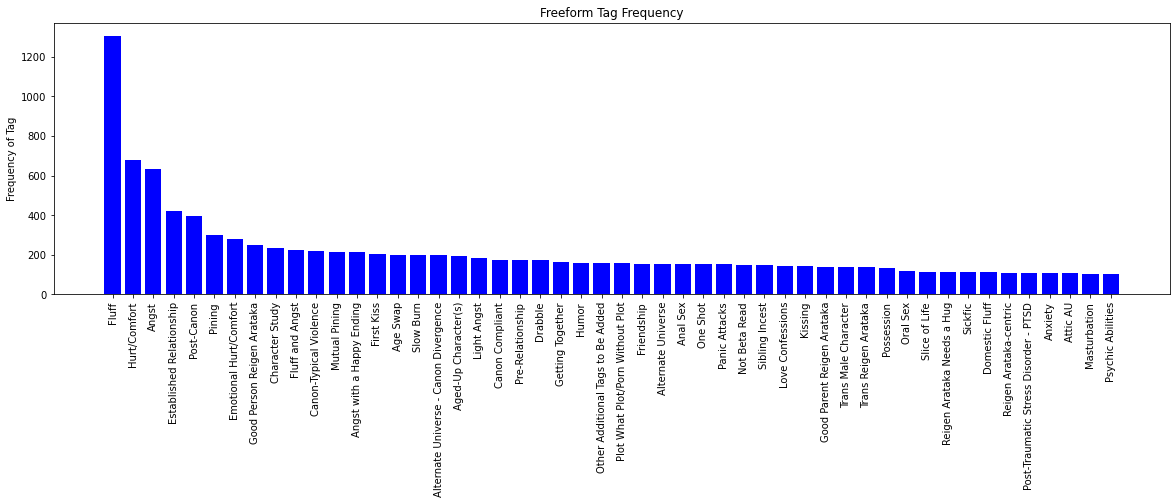

In [33]:
ls_free = df.freeforms.tolist()
ctr = Counter(chain.from_iterable(ls_free))
ctr.most_common(50)

y = [count for tag, count in ctr.most_common(50)]
x = [tag for tag, count in ctr.most_common(50)]

plt.bar(x, y, color='blue')
plt.title("Freeform Tag Frequency")
plt.ylabel("Frequency of Tag")
plt.xticks(rotation=90)
plt.show()

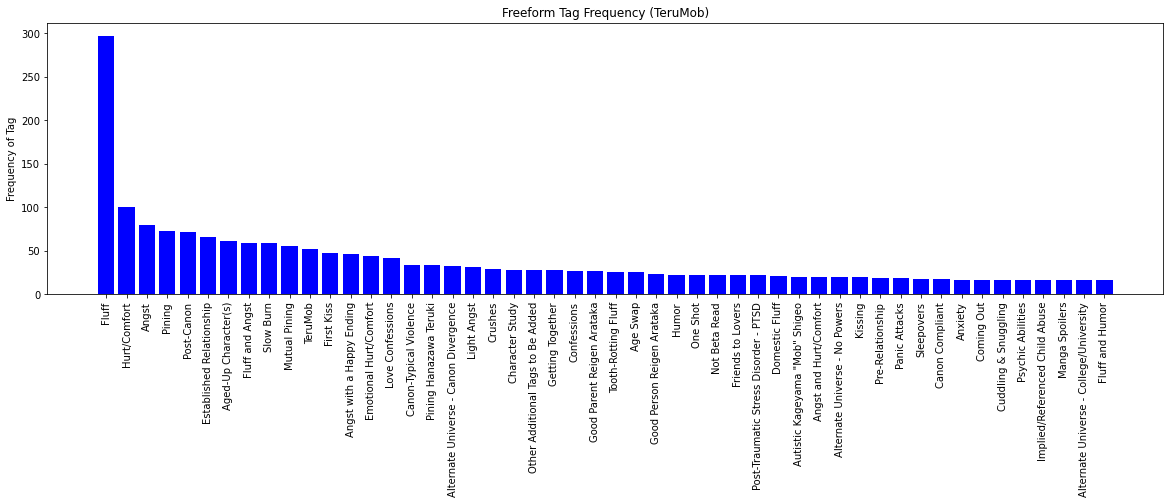

In [42]:
tm_free = tm.freeforms.tolist()
ctr = Counter(chain.from_iterable(tm_free))
ctr.most_common(50)

y = [count for tag, count in ctr.most_common(50)]
x = [tag for tag, count in ctr.most_common(50)]

plt.bar(x, y, color='blue')
plt.title("Freeform Tag Frequency (TeruMob)")
plt.ylabel("Frequency of Tag")
plt.xticks(rotation=90)
plt.show()

In [65]:
# authors by word count in mp100
author_words_sum = df[['author','words']].groupby('author').sum()
author_words_sum.sort_values('words', ascending=False)[0:50]

,words
author,
Green_Kneesocks,8082176
orphan_account,1513441
tinkertoysdamn,684669
ToastyToaster22,557219
Anonymous,452228
Phantomrose96,372314
tsukkisaur,369363
shcherbatskayas,344542
toyotas,336922


In [73]:
# authors in mp100
author_words_sum = df[['author'] + numeric_stats].groupby('author').sum()
author_words_sum.sort_values('kudos', ascending=False)[0:50]

,words,kudos,hits,comments,bookmarks,kudos_per_hits
author,,,,,,
orphan_account,1513441,72016,788877,5679,7110,39.107104
tinkertoysdamn,684669,32091,345953,4937,3420,9.158378
Janekfan,264230,29041,323795,1336,1533,14.132892
skeilig,187008,25052,196103,1996,2878,3.799676
ruthwrites,167053,24744,204542,2071,3565,1.802082
BeyondTheClouds777,206003,24698,160461,1380,3316,7.510266
snowtears,301727,23837,249377,2780,2641,4.239904
suitablyskippy,156000,19940,177932,1563,4170,2.274325
W3LTERW8,328676,19515,170923,1408,2129,9.734558
